In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

In [2]:
reg_path = "all_registration.csv"
reg_header = ["day", "date", "time", "user_id", "action", "born", "phone", "country", "acquired_from"]
registration = pd.read_csv(reg_path, delimiter=';', names = reg_header)
registration["date"] = pd.to_datetime(registration["date"])

free_path = "all_free_tree.csv"
free_tree = pd.read_csv(free_path, delimiter=';', names =["day", "date", "user_id", "action"])
free_tree["date"] = pd.to_datetime(free_tree["date"])

super_path = "all_super_tree.csv"
super_tree = pd.read_csv(super_path, delimiter=';', names =["day", "date", "user_id", "action"])
super_tree["date"] = pd.to_datetime(super_tree["date"])

In [3]:
free_sent = free_tree.groupby("user_id").count()[["action"]].rename(columns={"action": "free_sent"}).reset_index()
super_sent = super_tree.groupby("user_id").count()[["action"]].rename(columns={"action": "super_sent"}).reset_index()
paid_users = super_sent.copy()

paid_users = paid_users[super_sent["super_sent"] > 1]
paid_users["paid"] = paid_users["super_sent"] > 1
paid_users = paid_users.drop("super_sent", axis=1).reset_index(drop=True)

In [4]:
temp_data = registration.merge(free_sent, how="left", on="user_id")
temp_data = temp_data.merge(super_sent, how="left", on="user_id")
temp_data = temp_data.merge(paid_users, how="left", on="user_id")
temp_data = temp_data.fillna(0)
temp_data

,day,date,time,user_id,action,born,phone,country,acquired_from,free_sent,super_sent,paid
0,day_1,2023-10-13,00:32:11,1000001,registration,1983,android,sweden,invite_a_friend,5.0,0.0,0
1,day_1,2023-10-13,00:55:42,1000002,registration,1986,ios,united_states,invite_a_friend,4.0,0.0,0
2,day_1,2023-10-13,01:05:20,1000003,registration,1989,error,sweden,invite_a_friend,37.0,0.0,0
3,day_1,2023-10-13,01:23:24,1000004,registration,1994,error,germany,invite_a_friend,0.0,0.0,0
4,day_1,2023-10-13,01:24:16,1000005,registration,1986,ios,united_states,invite_a_friend,6.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
284417,day_273,2024-07-11,23:58:40,1284418,registration,1991,ios,philippines,article,1.0,0.0,0
284418,day_273,2024-07-11,23:58:57,1284419,registration,1989,ios,brazil,paid,0.0,0.0,0
284419,day_273,2024-07-11,23:59:08,1284420,registration,1985,android,sweden,google,1.0,0.0,0
284420,day_273,2024-07-11,23:59:22,1284421,registration,1991,error,united_states,invite_a_friend,9.0,4.0,True


In [5]:
all_data = temp_data.copy()
all_data = all_data.drop(["day", "date", "time", "action", "country", "born"], axis=1)
all_data

,user_id,phone,acquired_from,free_sent,super_sent,paid
0,1000001,android,invite_a_friend,5.0,0.0,0
1,1000002,ios,invite_a_friend,4.0,0.0,0
2,1000003,error,invite_a_friend,37.0,0.0,0
3,1000004,error,invite_a_friend,0.0,0.0,0
4,1000005,ios,invite_a_friend,6.0,0.0,0
...,...,...,...,...,...,...
284417,1284418,ios,article,1.0,0.0,0
284418,1284419,ios,paid,0.0,0.0,0
284419,1284420,android,google,1.0,0.0,0
284420,1284421,error,invite_a_friend,9.0,4.0,True


In [34]:
android = all_data[all_data.phone == "android"].reset_index(drop=True)
ios = all_data[all_data.phone == "ios"].reset_index(drop=True)

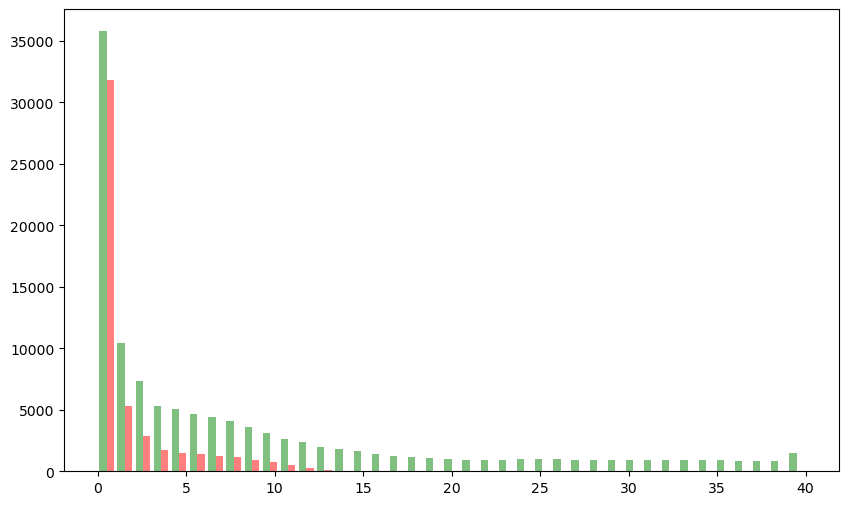

In [39]:
bins = np.linspace(0, 40, 40)
x = android["free_sent"]
y = ios["free_sent"]
data = [x, y]

plt.figure(figsize=(10,6))
plt.hist(data, bins, alpha = 0.5, color = ["g", "r"])
plt.show()

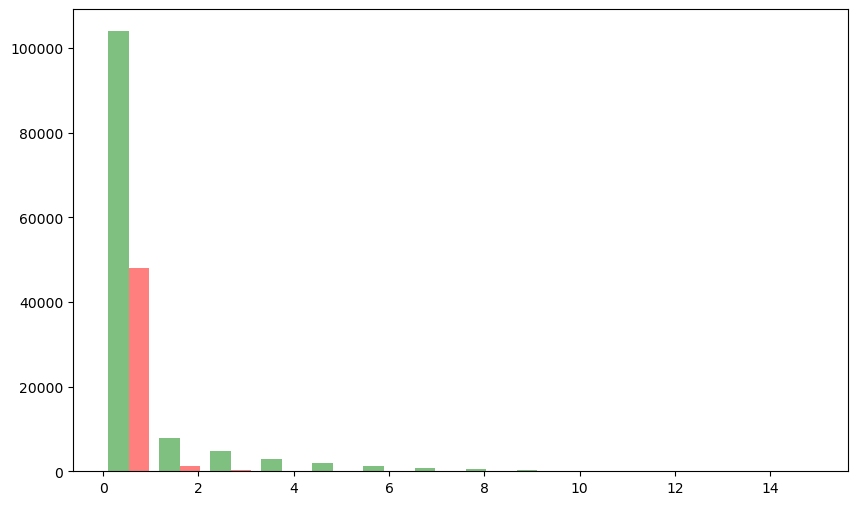

In [42]:
bins2 = np.linspace(0, 15, 15)
x2 = android["super_sent"]
y2 = ios["super_sent"]
data2 = [x2, y2]

plt.figure(figsize=(10,6))
plt.hist(data2, bins2, alpha = 0.5, color = ["g", "r"])
plt.show()

In [6]:
unknown_data = all_data.copy()
unknown_data = unknown_data[unknown_data["phone"] == "error"]
train_data = all_data.copy()
train_data = train_data[train_data["phone"] != "error"]

In [7]:
#train_data.groupby(["country", "phone", "acquired_from"]).count()

In [8]:
#country_code = {"brazil": 1, "germany": 2, "philippines": 3, "sweden": 4, "united_states": 5}
phone_code = {"android": 1, "ios": 2}
acquired_code = {"invite_a_friend": 1, "google": 2, "article": 3, "paid": 4}

In [9]:
#train_data["country"] = train_data["country"].map(country_code)
train_data["phone"] = train_data["phone"].map(phone_code)
train_data["acquired_from"] = train_data["acquired_from"].map(acquired_code)

unknown_data = unknown_data.drop("phone",axis=1)
#unknown_data["country"] = unknown_data["country"].map(country_code)
unknown_data["acquired_from"] = unknown_data["acquired_from"].map(acquired_code)

In [10]:
train_data

,user_id,phone,acquired_from,free_sent,super_sent,paid
0,1000001,1,1,5.0,0.0,0
1,1000002,2,1,4.0,0.0,0
4,1000005,2,1,6.0,0.0,0
5,1000006,1,1,4.0,0.0,0
6,1000007,1,1,11.0,1.0,0
...,...,...,...,...,...,...
284410,1284411,1,1,2.0,3.0,True
284416,1284417,1,1,1.0,1.0,0
284417,1284418,2,3,1.0,0.0,0
284418,1284419,2,4,0.0,0.0,0


In [11]:
x = train_data[["acquired_from", "free_sent", "super_sent", "paid"]]
y = train_data["phone"]

model = RandomForestClassifier(n_estimators=100, n_jobs=2)
model.fit(x, y)

RandomForestClassifier(n_jobs=2)

In [75]:
pred_test = model.predict(train_data[["acquired_from", "free_sent", "super_sent", "paid"]])
test_model = train_data.copy()
test_model["prediction"] = pred_test

wrong = test_model[test_model.phone != test_model.prediction].count()["user_id"]
right = test_model[test_model.phone == test_model.prediction].count()["user_id"]

print("Wrong predictions:", wrong)
print("Right predictions:", right)
print(f"{round(right / (wrong + right), 4) * 100}% accuracy")

Wrong predictions: 46738
Right predictions: 127205
73.13% accuracy


In [12]:
x2 = unknown_data[["acquired_from", "free_sent", "super_sent", "paid"]]

In [13]:
y2 = model.predict(x2)
y2

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [14]:
predicted_data = unknown_data.copy()
predicted_data["predictions"] = y2
predicted_data

,user_id,acquired_from,free_sent,super_sent,paid,predictions
2,1000003,1,37.0,0.0,0,1
3,1000004,1,0.0,0.0,0,2
9,1000010,1,1.0,6.0,True,1
10,1000011,1,11.0,2.0,True,1
11,1000012,1,35.0,0.0,0,1
...,...,...,...,...,...,...
284413,1284414,2,1.0,0.0,0,1
284414,1284415,1,1.0,0.0,0,1
284415,1284416,2,0.0,0.0,0,1
284420,1284421,1,9.0,4.0,True,1


In [15]:
#country_becode = {1: "brazil", 2: "germany", 3: "philippines", 4: "sweden", 5: "united_states"}
phone_becode = {1: "android", 2: "ios"}
acquired_becode = {1: "invite_a_friend",2: "google", 3: "article", 4: "paid"}

In [16]:
#predicted_data["country"] = predicted_data["country"].map(country_becode)
predicted_data["predictions"] = predicted_data["predictions"].map(phone_becode)
predicted_data["acquired_from"] = predicted_data["acquired_from"].map(acquired_becode)
predicted_data

,user_id,acquired_from,free_sent,super_sent,paid,predictions
2,1000003,invite_a_friend,37.0,0.0,0,android
3,1000004,invite_a_friend,0.0,0.0,0,ios
9,1000010,invite_a_friend,1.0,6.0,True,android
10,1000011,invite_a_friend,11.0,2.0,True,android
11,1000012,invite_a_friend,35.0,0.0,0,android
...,...,...,...,...,...,...
284413,1284414,google,1.0,0.0,0,android
284414,1284415,invite_a_friend,1.0,0.0,0,android
284415,1284416,google,0.0,0.0,0,android
284420,1284421,invite_a_friend,9.0,4.0,True,android


In [17]:
model.classes_ # 1: "android", 2: "ios"

array([1, 2], dtype=int64)

In [18]:
importances = model.feature_importances_
columns = x2.columns
for i in range(len(columns)):
    print(f"The importance of feature '{columns[i]}' is {round(importances[i] * 100, 2)}%.")

The importance of feature 'acquired_from' is 14.51%.
The importance of feature 'free_sent' is 70.08%.
The importance of feature 'super_sent' is 11.55%.
The importance of feature 'paid' is 3.85%.


In [19]:
predicted_data.groupby(["predictions"]).count()[["user_id"]].rename(columns={"user_id": "users"})

,users
predictions,
android,99568
ios,10911


In [20]:
registration.groupby(["phone"]).count()[["user_id"]].rename(columns={"user_id": "users"})

,users
phone,
android,124249
error,110479
ios,49694


In [21]:
train_data2 = train_data.copy()
train_data2 = train_data2.drop("paid", axis=1)
train_data2

,user_id,phone,acquired_from,free_sent,super_sent
0,1000001,1,1,5.0,0.0
1,1000002,2,1,4.0,0.0
4,1000005,2,1,6.0,0.0
5,1000006,1,1,4.0,0.0
6,1000007,1,1,11.0,1.0
...,...,...,...,...,...
284410,1284411,1,1,2.0,3.0
284416,1284417,1,1,1.0,1.0
284417,1284418,2,3,1.0,0.0
284418,1284419,2,4,0.0,0.0


In [22]:
x3 = train_data2[["acquired_from", "free_sent", "super_sent"]]
y3 = train_data2["phone"]
model2 = RandomForestClassifier(n_jobs=2, n_estimators=100)
model2.fit(x3, y3)

RandomForestClassifier(n_jobs=2)

In [23]:
unknown_data2 = unknown_data.copy()
unknown_data2 = unknown_data2.drop(["paid"], axis=1)
unknown_data2

,user_id,acquired_from,free_sent,super_sent
2,1000003,1,37.0,0.0
3,1000004,1,0.0,0.0
9,1000010,1,1.0,6.0
10,1000011,1,11.0,2.0
11,1000012,1,35.0,0.0
...,...,...,...,...
284413,1284414,2,1.0,0.0
284414,1284415,1,1.0,0.0
284415,1284416,2,0.0,0.0
284420,1284421,1,9.0,4.0


In [24]:
x4 = unknown_data2[["acquired_from", "free_sent", "super_sent"]]
y4 = model2.predict(x4)

In [25]:
importances2 = model2.feature_importances_
columns2 = x4.columns

for i in range(len(columns2)):
    print(f"The importance of feature '{columns2[i]}' is {round(importances2[i] * 100, 2)}%.")

The importance of feature 'acquired_from' is 10.02%.
The importance of feature 'free_sent' is 73.16%.
The importance of feature 'super_sent' is 16.82%.


In [26]:
predicted_data2 = unknown_data2.copy()
predicted_data2["predictions"] = y4

#predicted_data2["country"] = predicted_data2["country"].map(country_becode)
predicted_data2["acquired_from"] = predicted_data2["acquired_from"].map(acquired_becode)
predicted_data2["predictions"] = predicted_data2["predictions"].map(phone_becode)
predicted_data2

,user_id,acquired_from,free_sent,super_sent,predictions
2,1000003,invite_a_friend,37.0,0.0,android
3,1000004,invite_a_friend,0.0,0.0,ios
9,1000010,invite_a_friend,1.0,6.0,android
10,1000011,invite_a_friend,11.0,2.0,android
11,1000012,invite_a_friend,35.0,0.0,android
...,...,...,...,...,...
284413,1284414,google,1.0,0.0,android
284414,1284415,invite_a_friend,1.0,0.0,android
284415,1284416,google,0.0,0.0,android
284420,1284421,invite_a_friend,9.0,4.0,android


In [27]:
predicted_data2.groupby("predictions").count()[["user_id"]].rename(columns={"user_id": "users"})

,users
predictions,
android,99568
ios,10911
